# PYTHON PROJECT FOR PREDICTION OF DIABETES 

PROJECT MADE BY :
ROLL NO: 18BCE096-18BCE097


## PART-A  ( DATA VISUALIZATION )

IMPORTING MODULES
LIBRARIES USED :- PANDAS,NUMPY, SEABORN, SKLEARN,OPERATOR,OS,MISSINGNO

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
import csv
import math
import operator
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


#Reading Data from CSV file
data=pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BP,SkinT,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
#Statistical Analysis using pandas

data.describe()

,Pregnancies,Glucose,BP,SkinT,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.843750,120.820312,69.105469,20.536458,79.799479,31.997266,0.471876,33.265625,0.348958
std,3.370098,31.885004,19.355807,15.952218,115.244002,7.887853,0.331329,11.786000,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


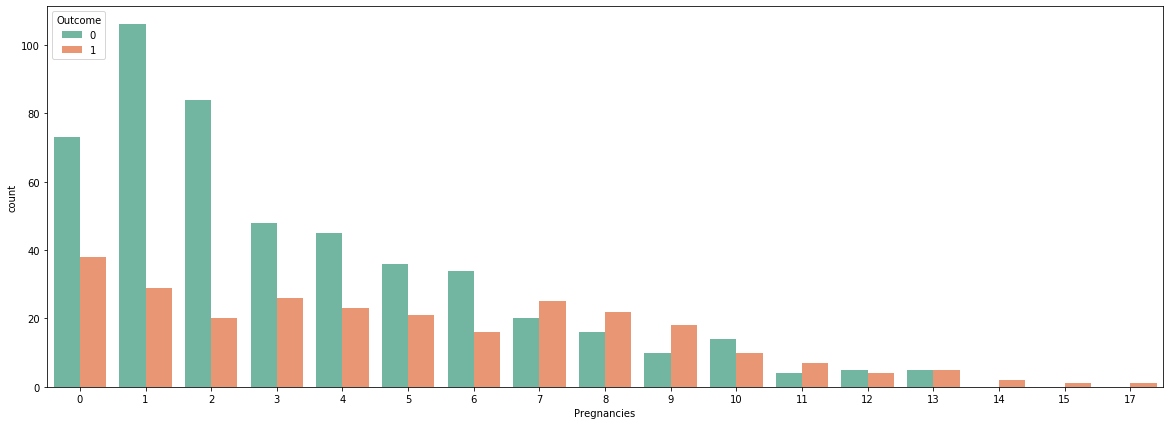

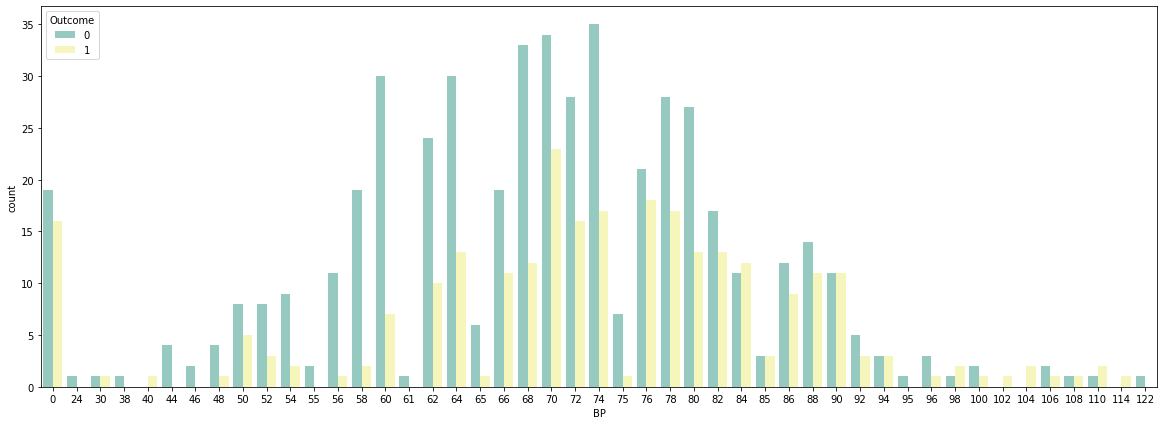

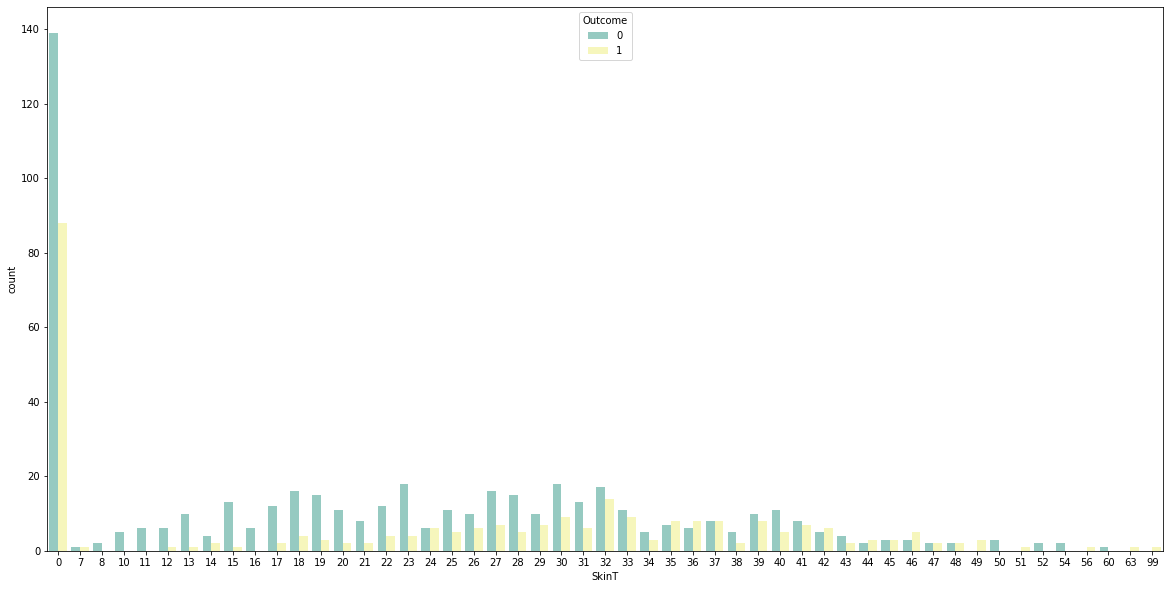

In [36]:
#Counter Plot to show count of each of attributes with respect to Outcome 
# x shows the attribute and y shows the count 
plt.figure(figsize=(20,7))
sns.countplot(x='Pregnancies',hue='Outcome',data=data,palette='Set2')
plt.show()
#In the same way we can take any attribute on X-axis EG:In below example I have taken Blood Pressure
plt.figure(figsize=(20,7))
sns.countplot(x='BP',hue='Outcome',data=data,palette='Set3')

plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x='SkinT',hue='Outcome',data=data,palette='Set3')

plt.show()

(768, 9)

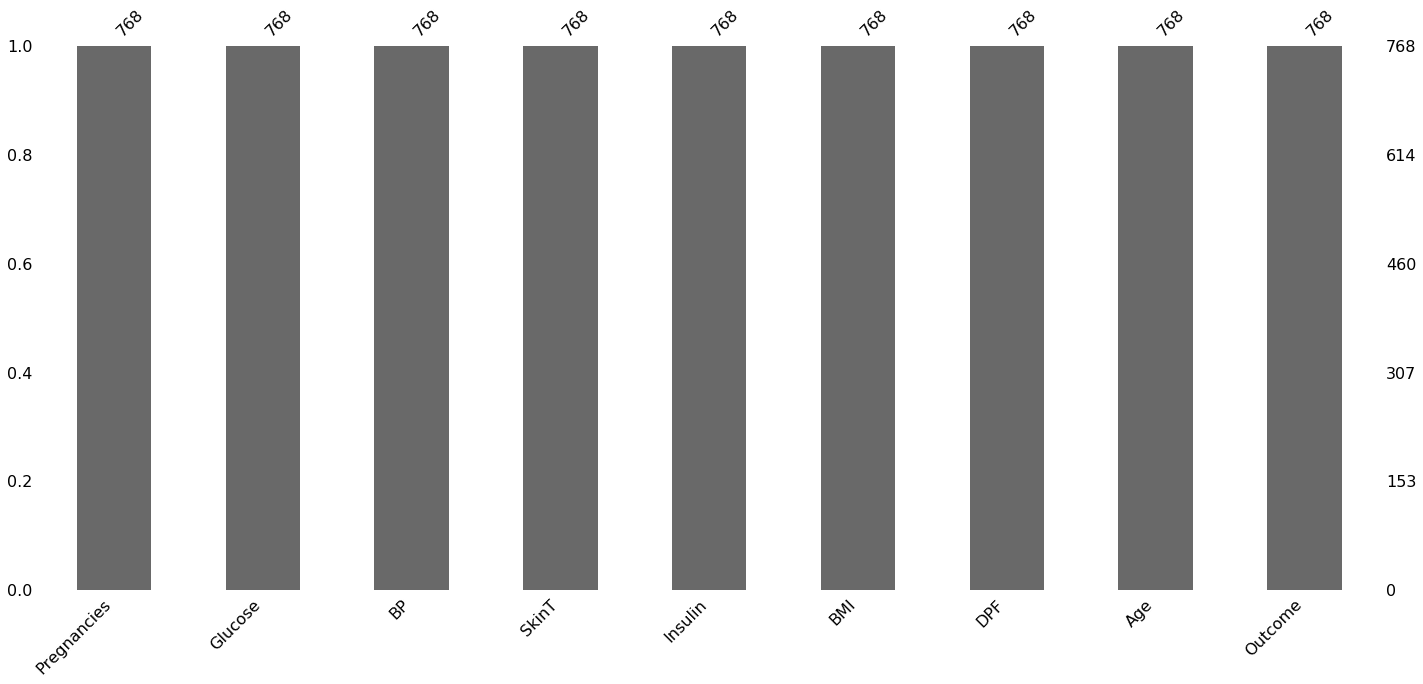

In [37]:
#To check if any of the columns in dataset contains missing values i.e. Values are not there

import missingno as ms
q=ms.bar(data)

#To check how many columns are there
data.shape

#After observing BarPlot we see that none of our data is empty

In [18]:
#Correlation Matrix is neccessary to find out relation between attributes(Features)
print(data.shape)
corrMa = data.corr()
corrMa.head()





(768, 9)


,Pregnancies,Glucose,BP,SkinT,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.130267,0.141242,-0.081695,-0.073927,0.017130,-0.033443,0.541827,0.221336
Glucose,0.130267,1.000000,0.152901,0.057272,0.329837,0.220444,0.138164,0.263720,0.464682
BP,0.141242,0.152901,1.000000,0.207371,0.088933,0.281701,0.041265,0.239101,0.065068
SkinT,-0.081695,0.057272,0.207371,1.000000,0.436783,0.392444,0.183928,-0.113528,0.074752
Insulin,-0.073927,0.329837,0.088933,0.436783,1.000000,0.198387,0.185071,-0.039879,0.130548


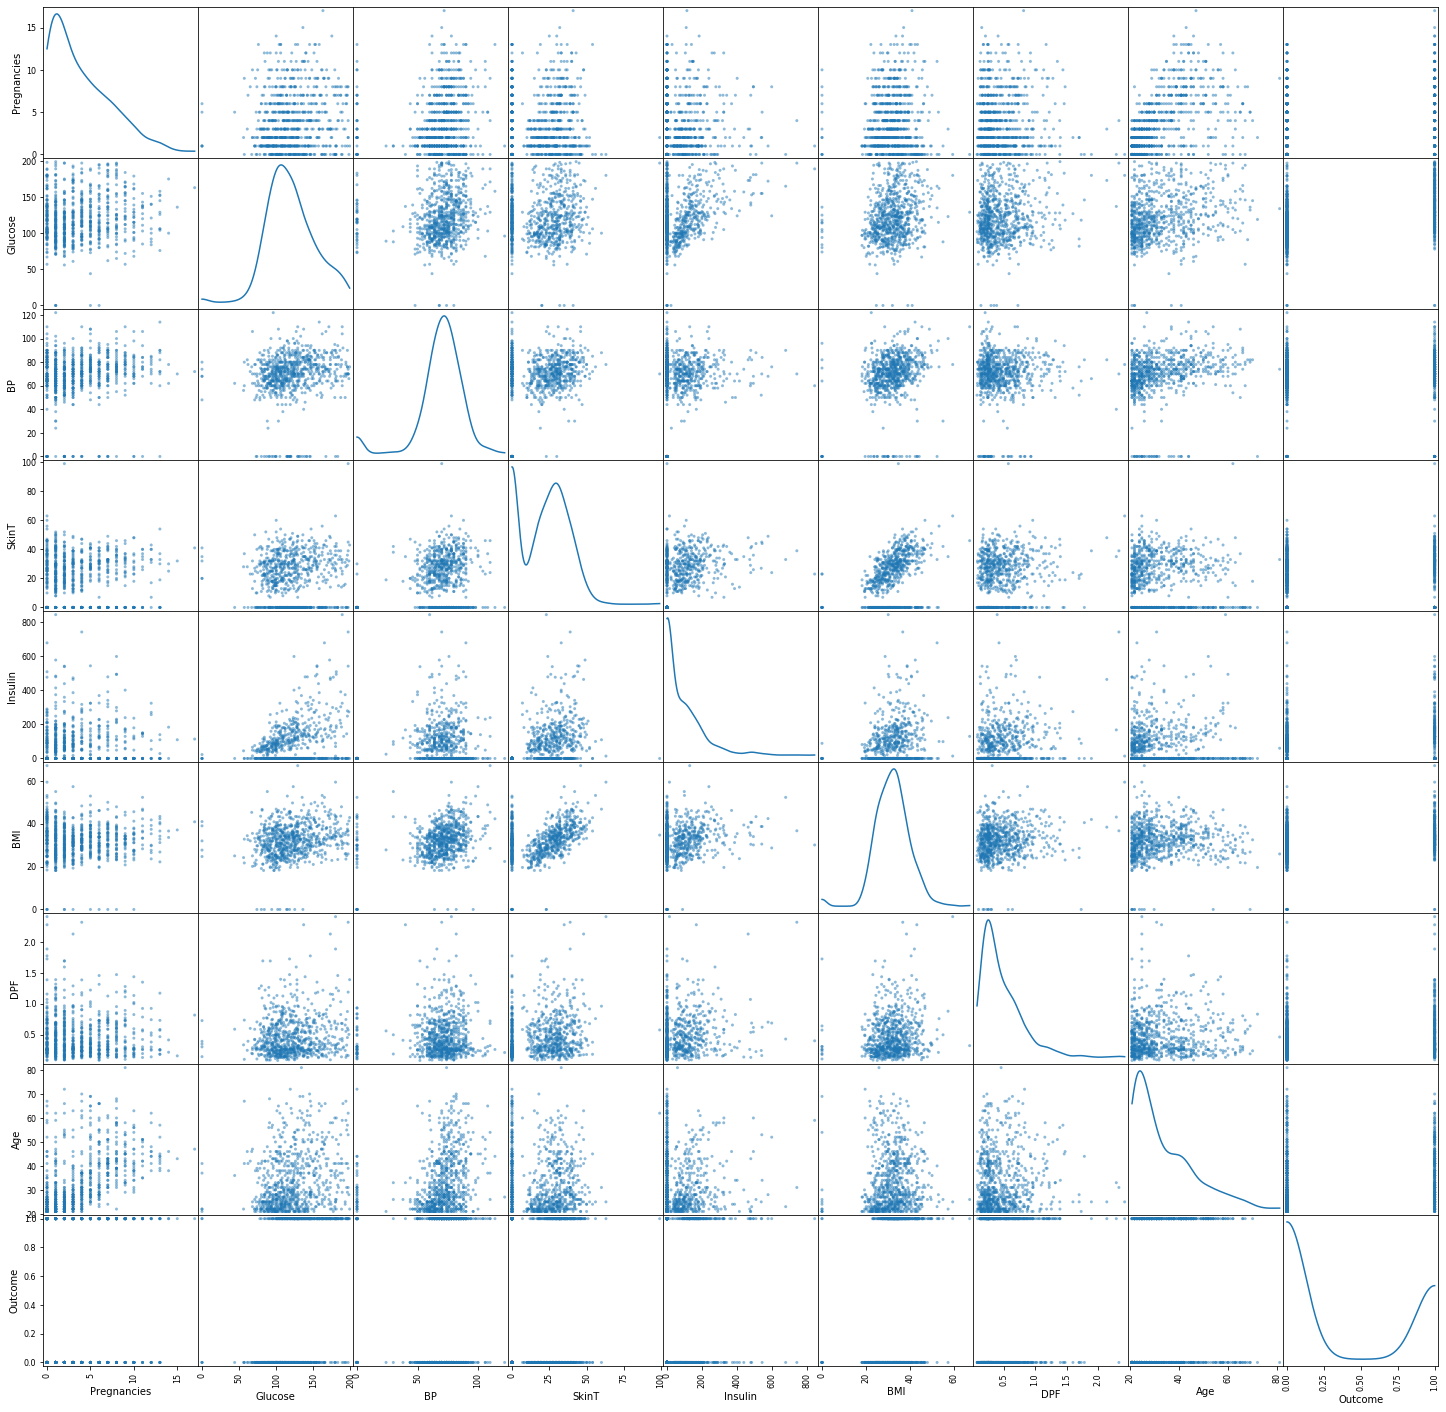

In [19]:
#To see how much data is scattered we usr Scatter_Matrix
#Scatter plots shows how much one variable is affected by another or the relationship between them 
#with the help of dots in two dimensions. Scatter plots are very much like line graphs in the concept 
#that they use horizontal and vertical axes to plot data points.

from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25,25),diagonal='kde')

## PART - 2 ( IMPLEMENTATION OF KNN ALGORITHM USING USER DEFINED FUNCTIONS )

FIRSTLY WE CREATE USER DEFINED FUNCTION AND FIND K MOST NEAREST NEIGHBOURS AND PREDICT THE OUTPUT ACCORDINGLY 
THEN WE WILL CHECK ACCURACY OF USER DEFINED FUNCTIONS WITH SCIKIT-LEARN

In [38]:
from collections import Counter
#Function that finds Euclidean Distance between two neighbours
#There are two types of distances 1)Euclidean Distance 2)Manhattan Distance
def Euclid_Distance(i1,i2,length):
    distance=0
    for x in range(length):
        distance+=pow((i1[x]-i2[x]),2)
    return math.sqrt(distance)

#Splitter Function to split given dataset to Training and Test Sets
def train_test_split(filename,split,train=[],test=[]):
    with open(filename,'r') as csvfile:
        lines=csv.reader(csvfile)
        dataset=list(lines)
        length=len(dataset)-1
        for x in range(1,length):
            for y in range(8):
                dataset[x][y]=float(dataset[x][y])
            if(random.random()<split):
                train.append(dataset[x])
            else:
                test.append(dataset[x])
                

                
#Function that finds list of neighbours 
def getNB(train,test,k):
    length=len(test)-1
    distances=[]
    for x in range(len(train)):
        dist=Euclid_Distance(test,train[x],length)
        distances.append((train[x],dist))
    distances.sort(key=operator.itemgetter(1))
    neigh=[]
    for x in range(k):
        neigh.append(distances[x][0])
    return neigh



#Function that finds the most nearest neighbour
def most_nearest_neighbour(neighbours):
    dicta={}
    for x in range(len(neighbours)):
        res=neighbours[x][-1]
        if res in dicta:
            dicta[res]+=1
        else:
            dicta[res]=1
    dicta1=sorted(dicta.items(),key=operator.itemgetter(1),reverse=True)
    return dicta1[0][0]




#Function that finds accuracy of prediction ( PredictedValues/OriginalOutcome)
def getAcc(test,prediction):
    correct=0
    for x in range(len(test)):
        if test[x][-1] is prediction[x]:
            correct+=1
    return (correct/float(len(test)))*100



#Main Function
def main():
    trainSet=[]
    testSet=[] 
    split=0.8                #Here we have used split ratio as 80-20(Train-Test)
    train_test_split('diabetes.csv',split,trainSet,testSet)
    print(len(trainSet),len(testSet))
    predictions=[]
    original=[]

    k=11   #Here we have taken k=11 i.e. We will select neighbours in the radius of 11
    for x in range(len(testSet)):
        neighbours=getNB(trainSet,testSet[x],k)
        result=most_nearest_neighbour(neighbours)
        predictions.append(result)
        original.append(testSet[x][-1])
        #print('>PREDICTED ='+repr(result)+'ACTUAL'+(testSet[x][-1]))
    accuracy=getAcc(testSet,predictions)
    print("Accuracy of  Prediction Model is {} %".format(accuracy))
    
    dicta={}
    dicta1={}
    dicta=Counter(predictions)
    dicta1=Counter(original)
    print(dicta)
    print(dicta1)
    plt.subplot(1, 2, 1)
    plt.title('Prediction Values Count')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.bar(range(len(dicta)), list(dicta.values()), align='center')
    plt.xticks(range(len(dicta)), list(dicta.keys()))
    plt.subplot(1, 2, 2)
    plt.title('Original Values Count')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.bar(range(len(dicta1)), list(dicta1.values()), align='center')
    plt.xticks(range(len(dicta1)), list(dicta1.keys()))
    plt.tight_layout()
    plt.show()
    







605 162
Accuracy of  Prediction Model is 76.5432098765432 %
Counter({'0': 117, '1': 45})
Counter({'0': 111, '1': 51})


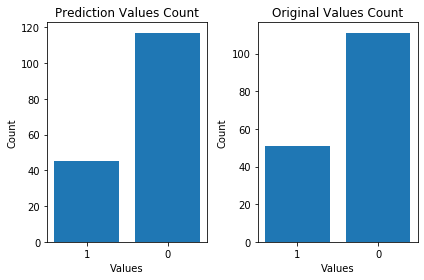

In [39]:
main()

## PART - 3 ( IMPLEMENTATION OF KNN ALGORITHM USING IN BUILT FUNCTIONS )

HERE WE WILL USE SCIKIT LEARN LIBRARIES TO COMPARE ACCURACIES OF OUR MODEL AND THAT OF SCIKIT LEARN

In [40]:
#IMPORTING SCALER FUNCTION 

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data.Outcome


In [41]:
#IMPORTING MODEL SELECTION MODULE

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [42]:
#IMPORTING MODULE THAT FINDS NEIGHBOURS

from sklearn.neighbors import KNeighborsClassifier


tS = []    #TEST SCORES
tRS = []   #TRAIN SCORES

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    tRS.append(knn.score(X_train,y_train))
    tS.append(knn.score(X_test,y_test))

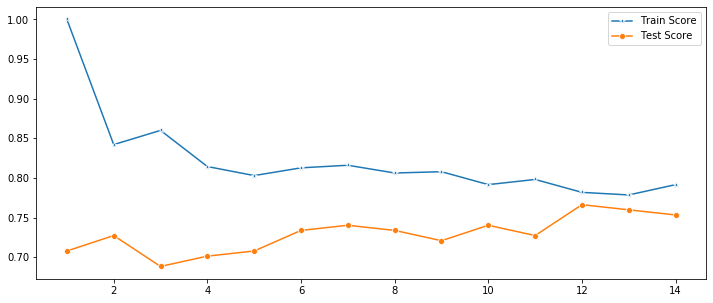

In [50]:
#GRAPH ANALYSIS SHOWS THAT K=12 IS BEST SUIT FOR OUR DATASET

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),tRS,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),tS,marker='o',label='Test Score')

In [43]:
#FINDING THE ACCURACY OF MODEL

knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
print('Accuracy of model is {} %'.format(knn.score(X_test,y_test)*100))


Accuracy of model is 76.62337662337663 %


ANALYSIS:


---->  WE ARE USING RANDOM SPLITTING STRATEGY TO SPLIT TRAIN DATA AND TEST DATA 
       SO ACCURACY OF USER DEFINED MODEL LIES IN RANGE ( 72-77 ) %

---->  WHILE IN CASE OF KNN USING SCIKIT LEARN WE GET ACCURACY IN RANGE OF ( 74-77 ) %

---->  ACCURACY ERROR LIES IN RANGE OF ( 1-5 ) %

##  PART - 4 ( FINDING OUT DECISION BOUNDARY USING LOGISTIC REGRESSION )

HERE FINDING OUT DECISION BOUNDARY MEANS WE WILL EVALUATE OUR MODEL WITH ANOTHER SET OF TEST CASES


LET'S SEE ITS IMPLEMENTATION USING SCIKIT LEARN

In [44]:
print(data.shape)

(768, 9)


In [59]:
#We have 768 datasets
#we will use ratio 75%-20%-5% for Train-Test-Check
# 75% of 768 = 575
from sklearn.externals import joblib 
from sklearn.linear_model import LogisticRegression
import numpy as np
train=data[:575]
test=data[575:728]
check=data[728:768]

tL= np.asarray(train['Outcome'])
tD = np.asarray(train.drop('Outcome',1))
teL = np.asarray(test['Outcome'])
teD = np.asarray(test.drop('Outcome',1))

#Normalization of Data
means = np.mean(tD, axis=0)
stds = np.std(tD, axis=0)
tD = (tD - means)/stds
teD = (teD - means)/stds


diabetesCheck = LogisticRegression()
diabetesCheck.fit(tD, tL)

accuracy = diabetesCheck.score(teD ,teL)
print("accuracy = ", accuracy * 100, "%")



joblib.dump([diabetesCheck, means, stds], 'diabetesModel.pkl')

diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(teD, teL)

sampleData = check[:1]


print("Orginal Output",sampleData.Outcome)

sDF = np.asarray(sampleData.drop('Outcome',1))
sDF = (sDF - means)/stds


# predict
predictionProbability = diabetesLoadedModel.predict_proba(sDF)
prediction = diabetesLoadedModel.predict(sDF)
print('Probability:', predictionProbability)

print('prediction:', prediction)

accuracy =  79.08496732026144 %
Orginal Output 728    0
Name: Outcome, dtype: int64
Probability: [[0.65947981 0.34052019]]
prediction: [0]


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## PART - 5 ( FEATURE IMPORTANCE USING SCIKIT LEARN ( RANDOM FOREST CLASSIFIER                         AND DECISION TREE ) 

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [61]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.727


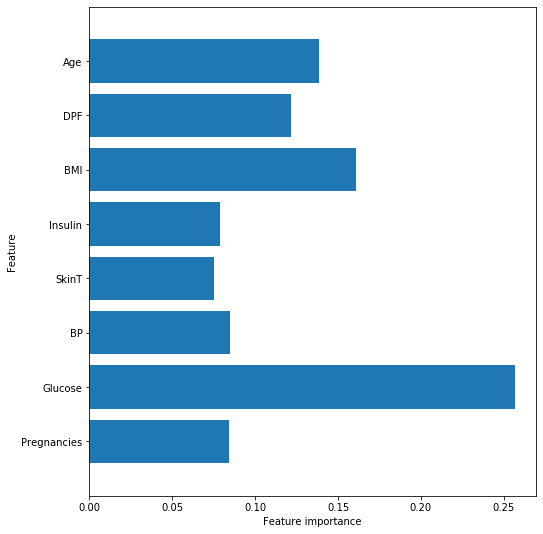

In [69]:
diabetes_features = [x for i,x in enumerate(data.columns) if i!=8]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,9))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(rf)

NOW WE WILL TAKE REAL TIME DATA FROM REPORT OF DIABETIC PATIENT AND CHECK THE OUTPUT WITH DECISION TREE AND RANDOM FOREST

In [84]:
from sklearn import tree
data['BMI'] = data['BMI'].astype(int)
data['DPF'] = data['DPF'].astype(int)
#print(data.head())

features=list(data.columns[:8])
#print(features)
y = data['Outcome']
x = data[features]
Tree = tree.DecisionTreeClassifier()
Tree = Tree.fit(x,y)

output = Tree.predict([[2,135,80,35,150,41,0.3,55]])
print (output)





['Pregnancies', 'Glucose', 'BP', 'SkinT', 'Insulin', 'BMI', 'DPF', 'Age']
[1]


In [89]:

#We will use combinations of 100 decision trees to make forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(x,y)

output =  forest.predict([[4,85,40,35,94,28.1,.97,33]])
output1 =  forest.predict([[2,135,80,35,150,41,0.3,55]])

print (output,output1)

[0] [1]


##  HYPOTHESIS TESTING 

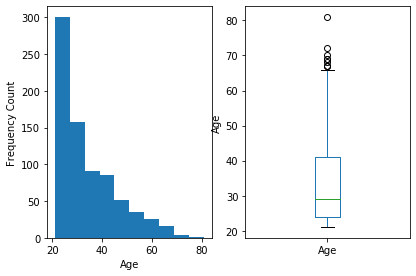

In [112]:
# wE WILL PLOT FREQUENCY PLOTS AND BOX PLOTS TO ANALYSE THE DATA
plt.subplot(1,2,1)

data[data['Age'] < 100]['Age'].sort_index().plot.hist()
plt.xlabel('Age')
plt.ylabel('Frequency Count')
plt.subplot(1,2,2)
plt.tight_layout()
plt.ylabel('Age')
data['Age'].plot.box()



#In the way we can carry out analysis by plotting another plots

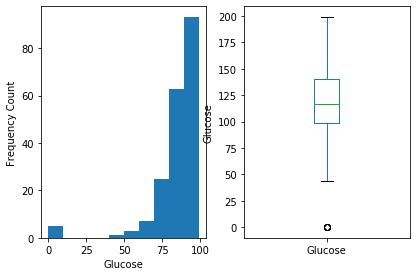

In [145]:
plt.subplot(1,2,1)

data[data['Glucose'] < 100]['Glucose'].sort_index().plot.hist()
plt.xlabel('Glucose')
plt.ylabel('Frequency Count')
plt.subplot(1,2,2)
plt.tight_layout()
plt.ylabel('Glucose')
data['Glucose'].plot.box()


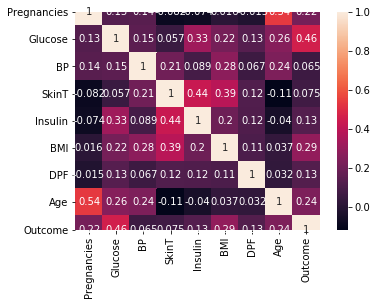

In [125]:
sns.heatmap(data.corr(),annot=True,square=True)

FROM HEATMAP IT IS CLEAR THAT SKIN THICKNESS, PEDIGREE FUNCTION ARE VERY LESS CORRELATED WITH OUT OUTPUT SO WE CAN DROP THEM

In [121]:
data.drop(['DPF','SkinT','Insulin'], axis = 1) 

,Pregnancies,Glucose,BP,BMI,Age,Outcome
0,6.0,148.0,72.0,33.0,50,1.0
1,1.0,85.0,66.0,26.0,31,0.0
2,8.0,183.0,64.0,23.0,32,1.0
3,1.0,89.0,66.0,28.0,21,0.0
4,0.0,137.0,40.0,43.0,33,1.0
...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.0,63,0.0
764,2.0,122.0,70.0,36.0,27,0.0
765,5.0,121.0,72.0,26.0,30,0.0
766,1.0,126.0,60.0,30.0,47,1.0


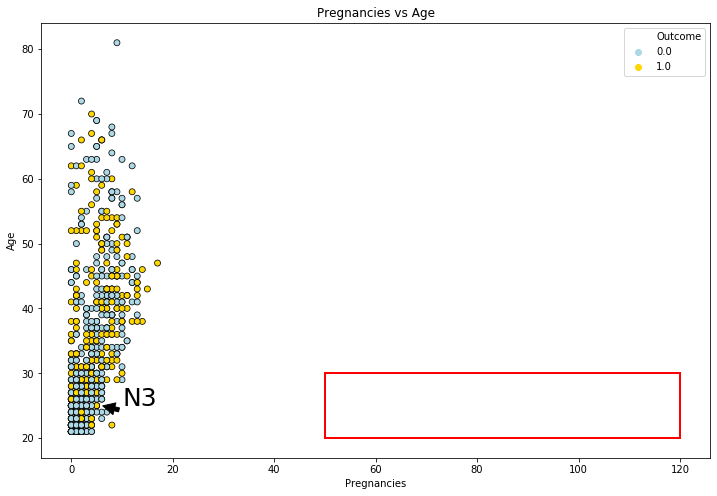

In [144]:
edgecolor = 'black'
palette ={0 : 'lightblue', 1 : 'gold'}
fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Pregnancies'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

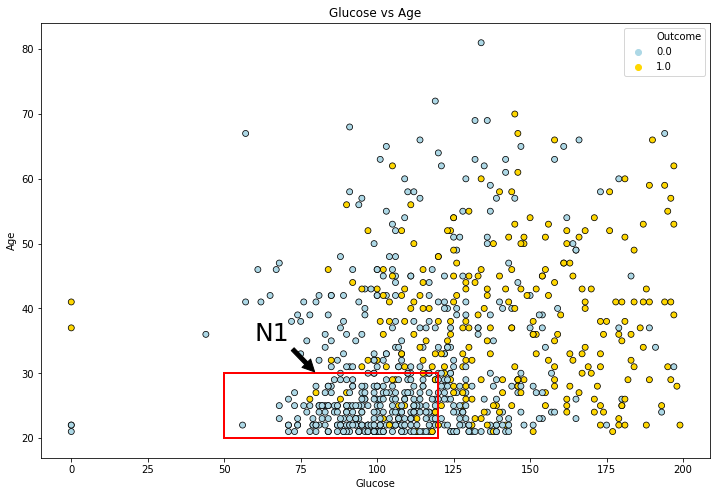

In [142]:
edgecolor = 'black'
palette ={0 : 'lightblue', 1 : 'gold'}
fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

## PART - 6 ( FINDING THE ACCURACY OF THE MODEL AFTER REMOVING REDUNDANT INFORMATION ) 

New dataset consists of Index(['Pregnancies', 'Glucose', 'BP', 'BMI', 'Age', 'Outcome'], dtype='object') most effective feature
602 165
Accuracy of  Prediction Model After dropping redundant feature is 78.78787878787878 %
Counter({'0': 119, '1': 46})
Counter({'0': 120, '1': 45})


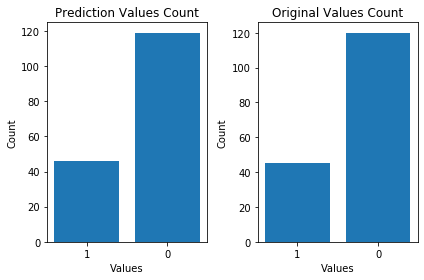

In [154]:

import pandas as pd
from collections import Counter
#Function that finds Euclidean Distance between two neighbours
#There are two types of distances 1)Euclidean Distance 2)Manhattan Distance
def Euclid_Distance(i1,i2,length):
    distance=0
    for x in range(length):
        distance+=pow((i1[x]-i2[x]),2)
    return math.sqrt(distance)

#Splitter Function to split given dataset to Training and Test Sets
def train_test_split(filename,split,train=[],test=[]):
    with open(filename,'r') as csvfile:
        lines=csv.reader(csvfile)
        dataset=list(lines)
        length=len(dataset)-1
        for x in range(1,length):
            for y in range(5):
                dataset[x][y]=float(dataset[x][y])
            if(random.random()<split):
                train.append(dataset[x])
            else:
                test.append(dataset[x])
                

                
#Function that finds list of neighbours 
def getNB(train,test,k):
    length=len(test)-1
    distances=[]
    for x in range(len(train)):
        dist=Euclid_Distance(test,train[x],length)
        distances.append((train[x],dist))
    distances.sort(key=operator.itemgetter(1))
    neigh=[]
    for x in range(k):
        neigh.append(distances[x][0])
    return neigh



#Function that finds the most nearest neighbour
def most_nearest_neighbour(neighbours):
    dicta={}
    for x in range(len(neighbours)):
        res=neighbours[x][-1]
        if res in dicta:
            dicta[res]+=1
        else:
            dicta[res]=1
    dicta1=sorted(dicta.items(),key=operator.itemgetter(1),reverse=True)
    return dicta1[0][0]




#Function that finds accuracy of prediction ( PredictedValues/OriginalOutcome)
def getAcc(test,prediction):
    correct=0
    for x in range(len(test)):
        if test[x][-1] is prediction[x]:
            correct+=1
    return (correct/float(len(test)))*100



#Main Function
def main():
    data=pd.read_csv('diabetes1.csv')
    trainSet=[]
    testSet=[] 
    split=0.8                #Here we have used split ratio as 80-20(Train-Test)
    train_test_split('diabetes1.csv',split,trainSet,testSet)
    print("New dataset consists of {} most effective feature".format(data.columns))
    print(len(trainSet),len(testSet))
    predictions=[]
    original=[]

    k=11   #Here we have taken k=11 i.e. We will select neighbours in the radius of 11
    for x in range(len(testSet)):
        neighbours=getNB(trainSet,testSet[x],k)
        result=most_nearest_neighbour(neighbours)
        predictions.append(result)
        original.append(testSet[x][-1])
        #print('>PREDICTED ='+repr(result)+'ACTUAL'+(testSet[x][-1]))
    accuracy=getAcc(testSet,predictions)
    print("Accuracy of  Prediction Model After dropping redundant feature is {} %".format(accuracy))
    
    dicta={}
    dicta1={}
    dicta=Counter(predictions)
    dicta1=Counter(original)
    print(dicta)
    print(dicta1)
    plt.subplot(1, 2, 1)
    plt.title('Prediction Values Count')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.bar(range(len(dicta)), list(dicta.values()), align='center')
    plt.xticks(range(len(dicta)), list(dicta.keys()))
    plt.subplot(1, 2, 2)
    plt.title('Original Values Count')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.bar(range(len(dicta1)), list(dicta1.values()), align='center')
    plt.xticks(range(len(dicta1)), list(dicta1.keys()))
    plt.tight_layout()
    plt.show()
    
    


main()




### IT IS NOTICEABLE THAT NEW ACCURACY IS  79 % WHICH IS HIGHER THAN OLD ACCURACY VALUE WHICH SHOWS THAT SOME OF THE FEATURES IN OLD DATASET WERE REDUNDANT